<a href="https://colab.research.google.com/github/dbolella/swift-python-interop-intro/blob/master/swift_python_interop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swift and Python Interopability
by Danny Bolella

To learn more about how this Colab works, check out the associated Medium article at: https://heartbeat.fritz.ai/swifty-ml-an-intro-to-swift-for-tensorflow-9edc7045bc0c

## Importing Python
Importing Python is as simple as... well... importing Python!  It's as simple as importing any other swift package. Let's do that now and also see which version Colab is currently defaulting to.

In [0]:
import Python
print(Python.version)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


## Importing Python Packages
The reason we would be interested in Python interoperability is to leverage the rich and well-established packages written in Python.  Particularly, there are some key packages from the Data Science community that are commonplace.

Fortunately, importing the packages we've come to know and love is also as straight-forward as just importing them.

When we do, the package is imported as a `PythonObject`, so we set it to a swift variable (much like we would set it to a variable in Python).

In [0]:
let np = Python.import("numpy")

print(type(of: np))
print(np.__version__)

PythonObject
1.17.5


When we go to use our package, however, we can use it as if we were writing a command in Python.  Any results would comeback in another `PythonObject`.

In [0]:
let x = np.linspace(0,10,20)

print(type(of: x))    //print swift type
print(Python.type(x)) //print python type
print(x)              //print object

PythonObject
<class 'numpy.ndarray'>
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


## Running Python Operations

If swift detects that we're working with a `PythonObject`, then it will pass operations over to Python to handle.

In [0]:
var x: PythonObject = 100   //explicitly create a PythonObject
print(x + 4)                //runs Python addition
print(type(of: (x + 4)))    //confirm the result is a PythonObject

104
PythonObject


This translates to packages that handle operators, themselves, such as NumPy

In [0]:
let big_array = np.random.randint(1, 100, 1000000)
print(np.divide(1.0, big_array))  //calling the divide ufunc in NumPy
print(1.0 / big_array)            //calling the same ufunc using it's operator

[0.01111111 0.01162791 0.07142857 ... 0.03703704 0.02857143 0.01369863]
[0.01111111 0.01162791 0.07142857 ... 0.03703704 0.02857143 0.01369863]


##Converting To/From Python and Swift Objects

The last bridge to be crossed in Swift/Python interop is converting objects between the two languages.  If we want our Swift data to be manipulated in Python and then expect to bring it back to be used in Swift code, conversion is essential.

Fortunately, this, too, is rather simple.

Take the example below.  We set a number of `PythonObjects` to a number of swift objects, yet they are automatically converted to Python objects.

In [0]:
let a: PythonObject = "Swift Rocks!"
let b: PythonObject = [9, 13, 93, 2]
let c: PythonObject = ["one": [6,5,4], "two": [3,2,1]]

print(type(of: a))
print(Python.type(a))
print(a)
print()
print(type(of: b))
print(Python.type(b))
print(b)
print()
print(type(of: c))
print(Python.type(c))
print(c)

PythonObject
<class 'str'>
Swift Rocks!

PythonObject
<class 'list'>
[9, 13, 93, 2]

PythonObject
<class 'dict'>
{'one': [6, 5, 4], 'two': [3, 2, 1]}


And then we can go back to swift.

In [0]:
let aa = String(a)!
let bb = Array<Int>(b)!
let cc: [String: [Int]] = Dictionary(c)!

print(type(of: aa))
print(aa)
print()
print(type(of: bb))
print(bb)
print()
print(type(of: cc))
print(cc)
print()

String
Swift Rocks!

Array<Int>
[9, 13, 93, 2]

Dictionary<String, Array<Int>>
["two": [3, 2, 1], "one": [6, 5, 4]]



##Plotting!

The last feature I'll show off is using `matplotlib` with Swift.  This is more exclusive to using Swift and Python in Google Colab, but is still pretty cool.  First, we do need to run a special command to enable displaying plots in Google Colab.

In [0]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


Then, we can simply setup a plot and display it in-line!

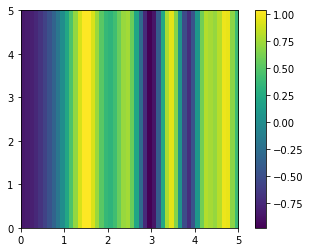

None


In [0]:
let plt = Python.import("matplotlib.pyplot")

let x = np.linspace(0, 5, 50)
let yy = np.linspace(0, 5, 50)//[:, np.newaxis]
let y = np.reshape(yy, Python.tuple([1,50]))
let z = np.power(np.sin(x), 10) + np.cos(10 + y * x) * np.cos(x)

plt.imshow(z, origin: "lower", extent: [0, 5, 0, 5], cmap: "viridis")
plt.colorbar()

plt.show()